# Deep Learning
## HW2


1.   Full Name: Alireza Maleki
2.   Student Number: 401210956


## Problem 3 - Hand shape

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as tc

In [51]:
cd "~/Documents/EE/sem 1/DL/HWs/2"

/Users/alireza/Documents/EE/sem 1/DL/HWs/2


In [52]:
df_train = pd.read_csv("Q3_train.csv")
df_test = pd.read_csv("Q3_test.csv")

df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


## Visulization

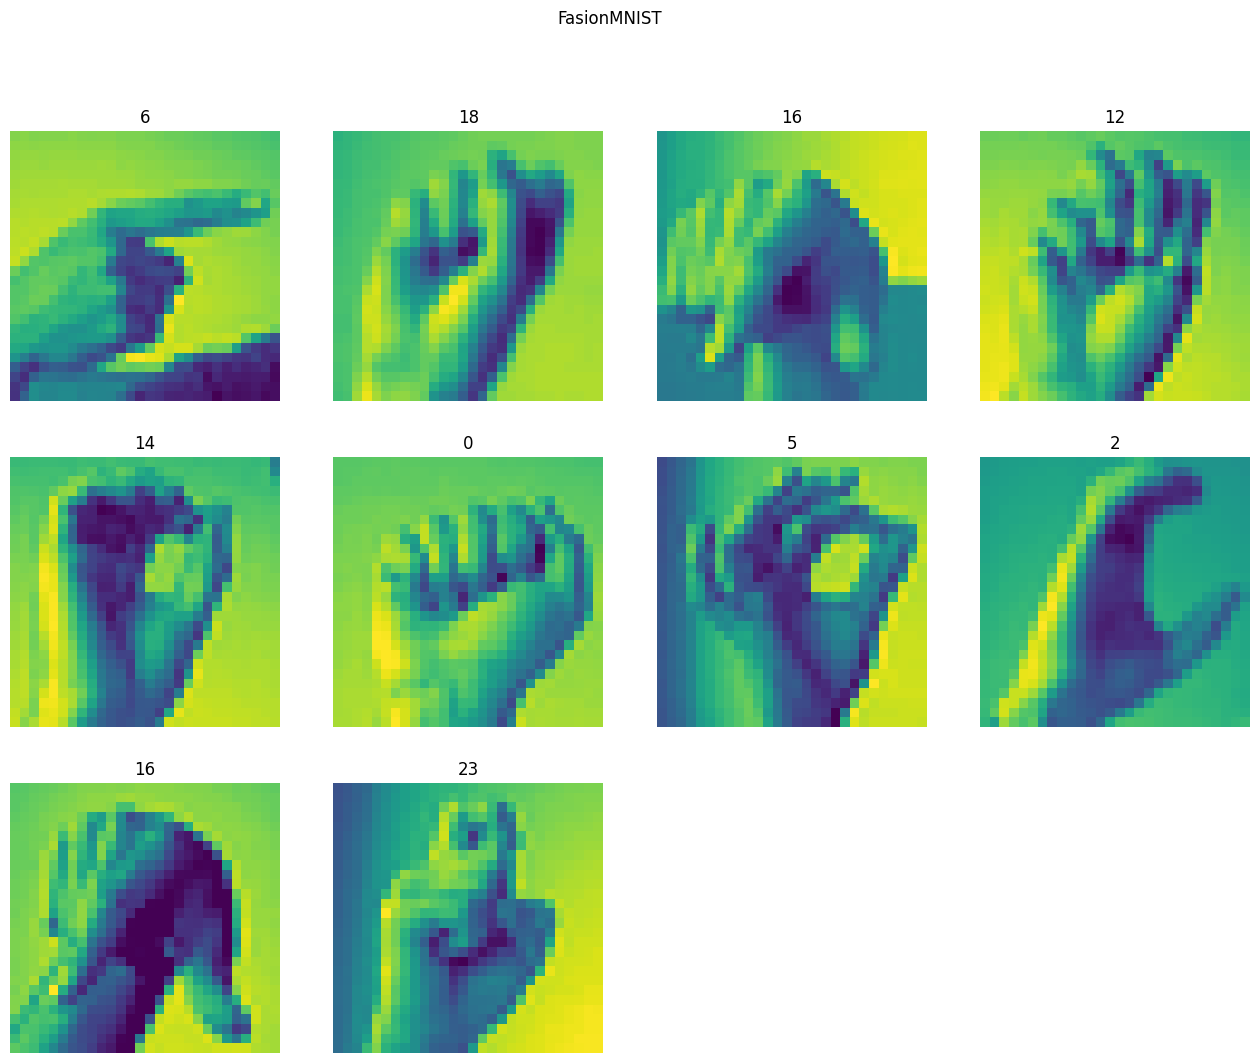

In [53]:
trainSize = df_train.shape

fig, ax = plt.subplots(3,4);
fig.set_size_inches(16, 12);
fig.suptitle("FasionMNIST")

shuf = np.random.permutation(trainSize[0])

for i in range(10):

  ind2, ind1 = i % 4, int(i/4)

  ax[ind1][ind2].imshow(df_train.iloc[shuf[i]][1:].to_numpy().reshape(28,28));
  ax[ind1][ind2].axis('off');
  ax[ind1][ind2].set_title(df_train.iloc[shuf[i]][0]);

ax[2][3].axis('off');
ax[2][2].axis('off');

## Training

In [54]:
from sklearn.utils import shuffle
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor

df_train = shuffle(df_train)

X = df_train.iloc[:,1:]

M = X.mean()
S = X.std()

X = (X-X.mean())/X.std()

y = df_train.iloc[:,0]


lt = int(len(X) * .75)
Xtrain, Xvalid = X[:lt], X[lt:]
ytrain, yvalid = y[:lt].to_numpy(dtype=int), y[lt:].to_numpy(dtype=int)

Dtrain = TensorDataset( Tensor(Xtrain.to_numpy()), Tensor(ytrain) )
Dvalid = TensorDataset( Tensor(Xvalid.to_numpy()), Tensor(yvalid) )

trainloader = DataLoader(Dtrain, batch_size=16)

del X, y, Xtrain, ytrain, Xvalid, yvalid

/var/folders/r6/p_jjsz0n7g1c9lrm2vjhgfg80000gn/T/ipykernel_42736/2342841428.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ytrain, yvalid = y[:lt].to_numpy(dtype=int), y[lt:].to_numpy(dtype=int)


In [55]:
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 50)
        self.fc5 = nn.Linear(50, 50)
        self.fc6 = nn.Linear(50, 26)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
print(net)
del net

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=50, bias=True)
  (fc6): Linear(in_features=50, out_features=26, bias=True)
)


In [56]:
loss_criterion = nn.CrossEntropyLoss()

def net_eval(Data, net):
    correct = 0
    total = 0
    with tc.no_grad():
        for data in Dtrain:
            X, y = data
            output = net(X.view(-1,X.shape[0]))
            for idx, i in enumerate(output):
                if tc.argmax(i) == y.to(dtype=tc.int64):                        
                    correct += 1
                total += 1
        
    return correct / total


def trainNN(trainloader, Dvalid, net, optimizer, epochs):
    
    for e in range(epochs):
        train_loss = 0.0
        for data, labels in trainloader:
            # Clear the gradients
            optimizer.zero_grad()
            # Forward Pass
            target = net(data)
            # Find the Loss
            loss = loss_criterion(target,labels.to(dtype=tc.int64))
            # Calculate gradients 
            loss.backward()
            # Update Weights
            optimizer.step()
            # Calculate Loss
            train_loss += loss.item()
        
        acc_train = net_eval(Dtrain, net)
        acc_valid = net_eval(Dvalid, net)

        
        print(f'Epoch {e+1} \t\t Training Loss: {round(train_loss / len(trainloader),4)}',
             "Train acc: %.3f, Valid accuracy:  %.3f" % (acc_train, acc_valid))
        
        if acc_train==1 and acc_valid==1 and round(train_loss/len(trainloader),4)==0:
            break
            


In [57]:
## Adams

epochs = 50
net_adam = Net()
optimizer = optim.Adam(net_adam.parameters(), lr=0.001)
trainNN(trainloader, Dvalid, net_adam, optimizer, epochs)

Epoch 1 		 Training Loss: 0.9713 Train acc: 0.956, Valid accuracy:  0.956
Epoch 2 		 Training Loss: 0.1367 Train acc: 0.995, Valid accuracy:  0.995
Epoch 3 		 Training Loss: 0.0798 Train acc: 0.998, Valid accuracy:  0.998
Epoch 4 		 Training Loss: 0.0567 Train acc: 1.000, Valid accuracy:  1.000
Epoch 5 		 Training Loss: 0.0002 Train acc: 1.000, Valid accuracy:  1.000
Epoch 6 		 Training Loss: 0.0001 Train acc: 1.000, Valid accuracy:  1.000
Epoch 7 		 Training Loss: 0.0 Train acc: 1.000, Valid accuracy:  1.000


In [58]:
## SGD

net_sgd = Net()
optimizer = optim.SGD(net_sgd.parameters(), lr=0.002)
trainNN(trainloader, Dvalid, net_sgd, optimizer, epochs)

Epoch 1 		 Training Loss: 3.2523 Train acc: 0.044, Valid accuracy:  0.044
Epoch 2 		 Training Loss: 3.2407 Train acc: 0.044, Valid accuracy:  0.044
Epoch 3 		 Training Loss: 3.2306 Train acc: 0.051, Valid accuracy:  0.051
Epoch 4 		 Training Loss: 3.2206 Train acc: 0.066, Valid accuracy:  0.066
Epoch 5 		 Training Loss: 3.2083 Train acc: 0.073, Valid accuracy:  0.073
Epoch 6 		 Training Loss: 3.1873 Train acc: 0.058, Valid accuracy:  0.058
Epoch 7 		 Training Loss: 3.1402 Train acc: 0.070, Valid accuracy:  0.070
Epoch 8 		 Training Loss: 3.0832 Train acc: 0.127, Valid accuracy:  0.127
Epoch 9 		 Training Loss: 2.9994 Train acc: 0.143, Valid accuracy:  0.143
Epoch 10 		 Training Loss: 2.8167 Train acc: 0.160, Valid accuracy:  0.160
Epoch 11 		 Training Loss: 2.5028 Train acc: 0.236, Valid accuracy:  0.236
Epoch 12 		 Training Loss: 2.1611 Train acc: 0.341, Valid accuracy:  0.341
Epoch 13 		 Training Loss: 1.8067 Train acc: 0.455, Valid accuracy:  0.455
Epoch 14 		 Training Loss: 1.4547 

___
### Comparing result:
#### As we can see, the convergence speed of Adam is faster than SGD. Because Adam use momentum and adapts the learning rate. However, Adam might have challange in the saddle points.

___

## adding dropout layer

In [59]:
class Net_drop(nn.Module):
    def __init__(self):
        super(Net_drop, self).__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 50)
        self.fc5 = nn.Linear(50, 50)
        self.drop = nn.Dropout(p=0.25)
        self.fc6 = nn.Linear(50, 26)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.drop(x)
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)
    
net = Net_drop()
print(net)
del net

Net_drop(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=50, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc6): Linear(in_features=50, out_features=26, bias=True)
)


In [60]:
## Adam

net_adam_drop = Net_drop()
optimizer = optim.Adam(net_adam_drop.parameters(), lr=0.001)
trainNN(trainloader, Dvalid, net_adam_drop, optimizer, epochs)

Epoch 1 		 Training Loss: 1.1972 Train acc: 0.875, Valid accuracy:  0.875
Epoch 2 		 Training Loss: 0.2699 Train acc: 0.946, Valid accuracy:  0.949
Epoch 3 		 Training Loss: 0.1373 Train acc: 0.984, Valid accuracy:  0.985
Epoch 4 		 Training Loss: 0.1023 Train acc: 0.981, Valid accuracy:  0.982
Epoch 5 		 Training Loss: 0.0785 Train acc: 0.977, Valid accuracy:  0.976
Epoch 6 		 Training Loss: 0.0747 Train acc: 0.985, Valid accuracy:  0.986
Epoch 7 		 Training Loss: 0.0677 Train acc: 0.999, Valid accuracy:  0.999
Epoch 8 		 Training Loss: 0.0516 Train acc: 0.981, Valid accuracy:  0.980
Epoch 9 		 Training Loss: 0.0885 Train acc: 0.996, Valid accuracy:  0.997
Epoch 10 		 Training Loss: 0.0694 Train acc: 0.999, Valid accuracy:  0.999
Epoch 11 		 Training Loss: 0.062 Train acc: 0.994, Valid accuracy:  0.994
Epoch 12 		 Training Loss: 0.0314 Train acc: 1.000, Valid accuracy:  0.999
Epoch 13 		 Training Loss: 0.0514 Train acc: 0.998, Valid accuracy:  0.998
Epoch 14 		 Training Loss: 0.0667 T

In [61]:
## SGD

net_sgd_drop = Net()
optimizer = optim.SGD(net_sgd_drop.parameters(), lr=0.002)
trainNN(trainloader, Dvalid, net_sgd_drop, optimizer, epochs)

Epoch 1 		 Training Loss: 3.2581 Train acc: 0.040, Valid accuracy:  0.040
Epoch 2 		 Training Loss: 3.2481 Train acc: 0.040, Valid accuracy:  0.040
Epoch 3 		 Training Loss: 3.24 Train acc: 0.057, Valid accuracy:  0.057
Epoch 4 		 Training Loss: 3.2331 Train acc: 0.068, Valid accuracy:  0.068
Epoch 5 		 Training Loss: 3.2271 Train acc: 0.066, Valid accuracy:  0.066
Epoch 6 		 Training Loss: 3.2216 Train acc: 0.064, Valid accuracy:  0.064
Epoch 7 		 Training Loss: 3.2165 Train acc: 0.065, Valid accuracy:  0.065
Epoch 8 		 Training Loss: 3.2112 Train acc: 0.074, Valid accuracy:  0.074
Epoch 9 		 Training Loss: 3.2055 Train acc: 0.079, Valid accuracy:  0.079
Epoch 10 		 Training Loss: 3.1987 Train acc: 0.080, Valid accuracy:  0.080
Epoch 11 		 Training Loss: 3.189 Train acc: 0.078, Valid accuracy:  0.078
Epoch 12 		 Training Loss: 3.1707 Train acc: 0.096, Valid accuracy:  0.096
Epoch 13 		 Training Loss: 3.1292 Train acc: 0.121, Valid accuracy:  0.121
Epoch 14 		 Training Loss: 3.0641 Tra

___
### Comparing result:
#### By adding dropout layer the convergence process gets slower (because of adding excessive randomness) and reaching to high accuracy rate takes more time. In cases which we need more complecated network, dropout can be helpful, because it randomly controls the gradient flow.

## Test Data

In [62]:
Xtest = df_test.iloc[:,1:]

M = Xtest.mean()
S = Xtest.std()

Xtest = (Xtest-M)/S

ytest = df_test.iloc[:,0]

Dtest = TensorDataset( Tensor(Xtest.to_numpy()), Tensor(ytest.to_numpy(dtype=int)) )

In [63]:
def test_eval(Data, net):
    train_loss = 0.0
    for data, labels in Data:
        target = net(data.view(-1,data.shape[0]))
        # Find the Loss
        loss = loss_criterion(target[0],labels.to(dtype=tc.int64))
        train_loss += loss.item()
        
    print(f'Training Loss: {round(train_loss / len(Data),4)}', "Test acc: %.3f" % (net_eval(Data, net)))

In [64]:
networks = ["net_adam", "net_sgd", "net_adam_drop", "net_sgd_drop"]


for i, net in enumerate([net_adam, net_sgd, net_adam_drop, net_sgd_drop]):
    print(networks[i])
    test_eval(Dtest, net)
    print("\n")
    


net_adam
Training Loss: 1.9801 Test acc: 1.000


net_sgd
Training Loss: 5.0826 Test acc: 1.000


net_adam_drop
Training Loss: 3.0555 Test acc: 0.999


net_sgd_drop
Training Loss: 5.6944 Test acc: 1.000


